<a href="https://colab.research.google.com/github/osr3173/2024-DataScience/blob/main/Week2_mission_osr3173_ipyhb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

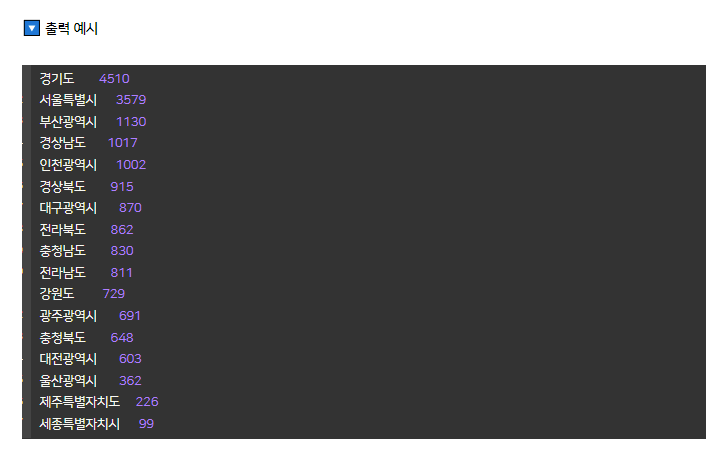

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [ ]:
df[df['상권업종소분류명']=='약국'].value_counts(df['시도명'])

,count
시도명,
경기도,4510
서울특별시,3579
부산광역시,1130
경상남도,1017
인천광역시,1002
경상북도,915
대구광역시,870
전라북도,862
충청남도,830


📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
다음의 결과가 나오도록 구합니다.

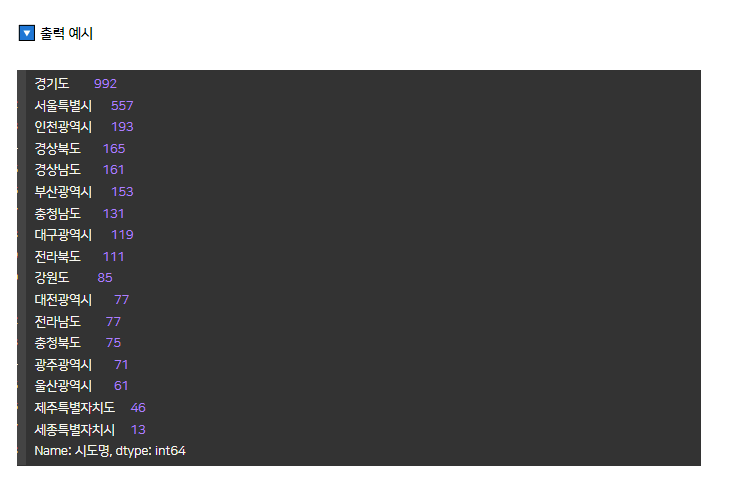

In [ ]:
df_animal=df[df['상권업종소분류명']=='동물병원'].value_counts(df['시도명'])
df_animal

,count
시도명,
경기도,992
서울특별시,557
인천광역시,193
경상북도,165
경상남도,161
부산광역시,153
충청남도,131
대구광역시,119
전라북도,111


<Axes: xlabel='시도명'>

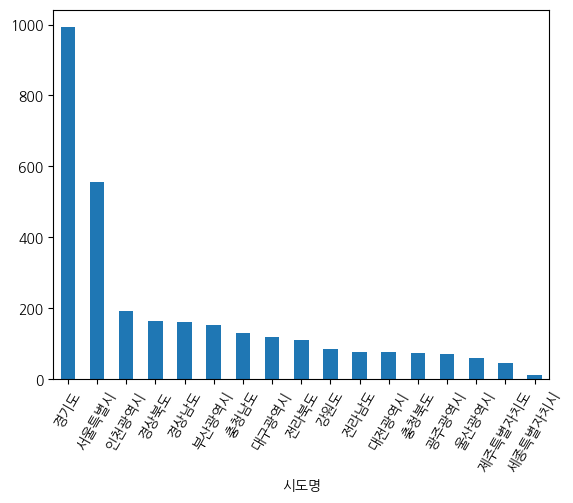

In [ ]:
import koreanize_matplotlib
df_animal.plot.bar(rot=60)

📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
비율이 높은 순서대로 정렬되게 구해주세요!
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

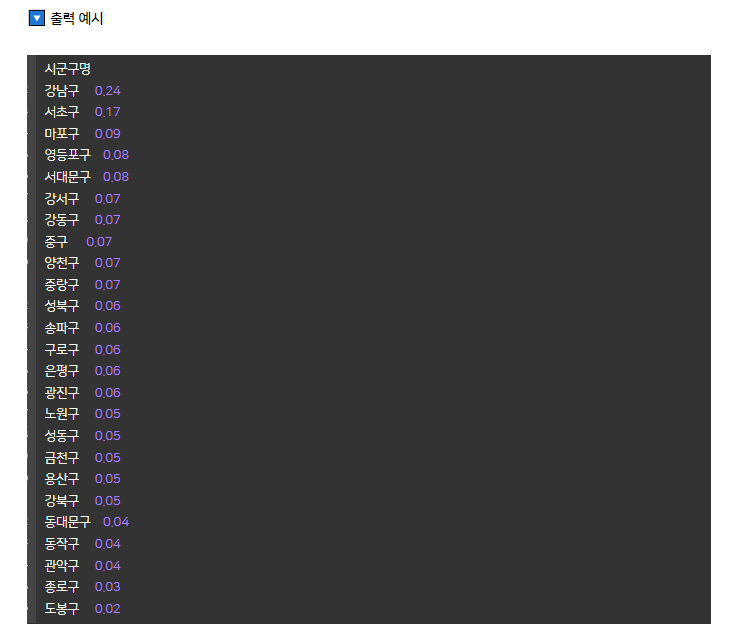

In [ ]:
df_seoul = df[(df["상권업종중분류명"].str.contains("병원")) & (df["시도명"] == "서울특별시")]
df_seoul = round(df_seoul.loc[df_seoul["상권업종소분류명"].str.contains("피부|성형"), "시군구명"].value_counts() / df_seoul["시군구명"].value_counts(),2)
df_seoul

,count
시군구명,
강남구,0.24
강동구,0.07
강북구,0.05
강서구,0.07
관악구,0.04
광진구,0.06
구로구,0.06
금천구,0.05
노원구,0.05


📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html


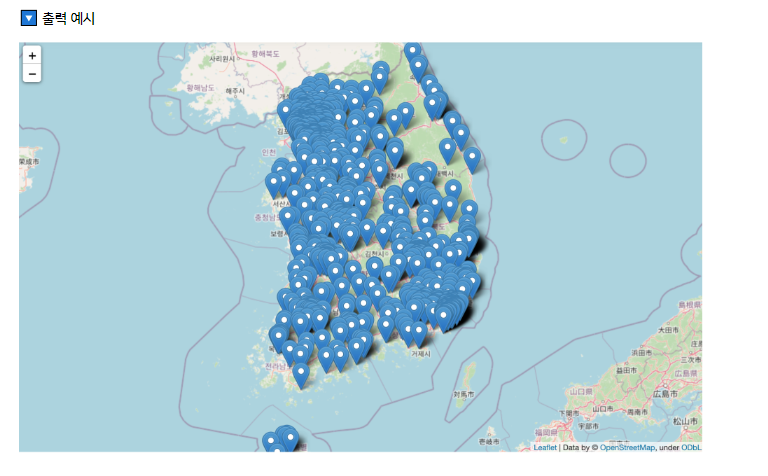

In [ ]:
df_silver = df[(df["상권업종소분류명"] == "노인/치매병원") & ~df["시도명"].isnull()]

import folium

map=folium.Map(location=[df_silver['위도'].mean(),df_silver['경도'].mean()],zoom_start=7)

for n in df_silver.index:

    name=df_silver.loc[n,'상호명']
    address=df_silver.loc[n,'도로명주소']
    popup=f"{name}-{address}"
    location=[df_silver.loc[n,'위도'],df_silver.loc[n,'경도']]
    folium.Marker(
        location=location,
        popup=popup,
    ).add_to(map)
map
